In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

627

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | half moon bay
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | poum
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | torbay
Processing Record 9 of Set 1 | port elizabeth
Processing Record 10 of Set 1 | luderitz
Processing Record 11 of Set 1 | mandalgovi
Processing Record 12 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 13 of Set 1 | geraldton
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | mamakan
Processing Record 17 of Set 1 | cape town
Processing Record 18 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 19 of Set 1 | lar
Processing Record 20 of Set 1 | muchkapskiy
Processing Record 21 of Set 1 | ust-nera
Processin

Processing Record 38 of Set 4 | araouane
Processing Record 39 of Set 4 | kavaratti
Processing Record 40 of Set 4 | oussouye
Processing Record 41 of Set 4 | usinsk
Processing Record 42 of Set 4 | lisakovsk
Processing Record 43 of Set 4 | thompson
Processing Record 44 of Set 4 | la romana
Processing Record 45 of Set 4 | port said
Processing Record 46 of Set 4 | barrow
Processing Record 47 of Set 4 | ahipara
Processing Record 48 of Set 4 | sal rei
Processing Record 49 of Set 4 | sabang
Processing Record 50 of Set 4 | igarka
Processing Record 1 of Set 5 | cayenne
Processing Record 2 of Set 5 | port blair
Processing Record 3 of Set 5 | shubarshi
Processing Record 4 of Set 5 | nouadhibou
Processing Record 5 of Set 5 | petropavlovka
Processing Record 6 of Set 5 | marquette
Processing Record 7 of Set 5 | butaritari
Processing Record 8 of Set 5 | ukiah
Processing Record 9 of Set 5 | mendi
Processing Record 10 of Set 5 | bathsheba
Processing Record 11 of Set 5 | sangrur
Processing Record 12 of S

Processing Record 26 of Set 8 | padrauna
Processing Record 27 of Set 8 | hamilton
Processing Record 28 of Set 8 | arequipa
Processing Record 29 of Set 8 | sompeta
Processing Record 30 of Set 8 | hami
Processing Record 31 of Set 8 | yulin
Processing Record 32 of Set 8 | kuopio
Processing Record 33 of Set 8 | elbistan
Processing Record 34 of Set 8 | armacao dos buzios
City not found. Skipping...
Processing Record 35 of Set 8 | diamantino
Processing Record 36 of Set 8 | sao joao da barra
Processing Record 37 of Set 8 | semirom
Processing Record 38 of Set 8 | locri
Processing Record 39 of Set 8 | daryapur
Processing Record 40 of Set 8 | yar-sale
Processing Record 41 of Set 8 | jacareacanga
Processing Record 42 of Set 8 | fengzhen
Processing Record 43 of Set 8 | kangaatsiaq
Processing Record 44 of Set 8 | sapele
Processing Record 45 of Set 8 | dovers
Processing Record 46 of Set 8 | umm lajj
Processing Record 47 of Set 8 | sinnar
Processing Record 48 of Set 8 | jijiang
Processing Record 49 o

Processing Record 10 of Set 12 | novaya ladoga
Processing Record 11 of Set 12 | mangrol
Processing Record 12 of Set 12 | paamiut
Processing Record 13 of Set 12 | jan kempdorp
Processing Record 14 of Set 12 | codrington
Processing Record 15 of Set 12 | kalamazoo
Processing Record 16 of Set 12 | sakaiminato
Processing Record 17 of Set 12 | marinette
Processing Record 18 of Set 12 | hawalli
Processing Record 19 of Set 12 | camacha
Processing Record 20 of Set 12 | quatre cocos
Processing Record 21 of Set 12 | basco
Processing Record 22 of Set 12 | tilichiki
Processing Record 23 of Set 12 | halalo
City not found. Skipping...
Processing Record 24 of Set 12 | trelew
Processing Record 25 of Set 12 | noumea
Processing Record 26 of Set 12 | labrea
Processing Record 27 of Set 12 | vao
Processing Record 28 of Set 12 | roebourne
Processing Record 29 of Set 12 | mareeba
Processing Record 30 of Set 12 | ornes
Processing Record 31 of Set 12 | manokwari
Processing Record 32 of Set 12 | finschhafen
Proc

In [11]:
len(city_data)

570

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Half Moon Bay,37.4636,-122.4286,53.94,95,90,0.00,US,2021-12-08 14:45:58
1,Busselton,-33.6500,115.3333,81.05,57,0,9.84,AU,2021-12-08 14:45:59
2,Mataura,-46.1927,168.8643,53.47,95,100,0.27,NZ,2021-12-08 14:45:59
3,Poum,-20.2333,164.0167,81.43,76,25,8.88,NC,2021-12-08 14:46:00
4,Rikitea,-23.1203,-134.9692,75.33,61,18,16.89,PF,2021-12-08 14:46:00
5,Bredasdorp,-34.5322,20.0403,72.28,66,75,18.23,ZA,2021-12-08 14:46:00
6,Vaini,-21.2000,-175.2000,75.36,88,75,6.91,TO,2021-12-08 14:46:01
7,Torbay,47.6666,-52.7314,35.58,58,75,14.97,CA,2021-12-08 14:45:10
8,Port Elizabeth,-33.9180,25.5701,70.09,78,90,9.22,ZA,2021-12-08 14:46:02
9,Luderitz,-26.6481,15.1594,70.20,67,0,18.68,NA,2021-12-08 14:46:02


In [13]:
# Reorder columns
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Half Moon Bay,US,2021-12-08 14:45:58,37.4636,-122.4286,53.94,95,90,0.00
1,Busselton,AU,2021-12-08 14:45:59,-33.6500,115.3333,81.05,57,0,9.84
2,Mataura,NZ,2021-12-08 14:45:59,-46.1927,168.8643,53.47,95,100,0.27
3,Poum,NC,2021-12-08 14:46:00,-20.2333,164.0167,81.43,76,25,8.88
4,Rikitea,PF,2021-12-08 14:46:00,-23.1203,-134.9692,75.33,61,18,16.89
5,Bredasdorp,ZA,2021-12-08 14:46:00,-34.5322,20.0403,72.28,66,75,18.23
6,Vaini,TO,2021-12-08 14:46:01,-21.2000,-175.2000,75.36,88,75,6.91
7,Torbay,CA,2021-12-08 14:45:10,47.6666,-52.7314,35.58,58,75,14.97
8,Port Elizabeth,ZA,2021-12-08 14:46:02,-33.9180,25.5701,70.09,78,90,9.22
9,Luderitz,NA,2021-12-08 14:46:02,-26.6481,15.1594,70.20,67,0,18.68


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

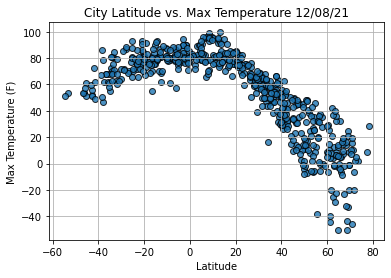

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

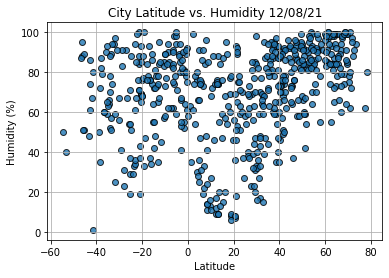

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

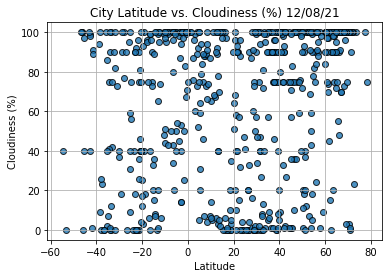

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

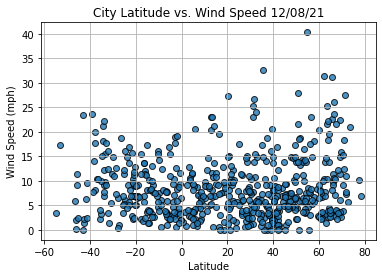

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
index13 = city_data_df.loc[13]
index13

City                 Punta Arenas
Country                        CL
Date          2021-12-08 14:44:05
Lat                        -53.15
Lng                      -70.9167
Max Temp                    53.71
Humidity                       40
Cloudiness                      0
Wind Speed                  17.27
Name: 13, dtype: object

In [24]:
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3      False
4      False
       ...  
565     True
566     True
567     True
568     True
569     True
Name: Lat, Length: 570, dtype: bool

In [25]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Half Moon Bay,US,2021-12-08 14:45:58,37.4636,-122.4286,53.94,95,90,0.00
7,Torbay,CA,2021-12-08 14:45:10,47.6666,-52.7314,35.58,58,75,14.97
10,Mandalgovi,MN,2021-12-08 14:46:02,45.7625,106.2708,23.27,37,100,9.28
14,Mamakan,RU,2021-12-08 14:46:04,57.8161,114.0028,27.57,78,100,18.23
16,Lar,IN,2021-12-08 14:46:04,26.2039,83.9717,68.79,40,0,5.91
...,...,...,...,...,...,...,...,...,...
565,Peace River,CA,2021-12-08 15:00:20,56.2501,-117.2860,31.66,99,100,3.00
566,Ushtobe,KZ,2021-12-08 15:01:49,45.2514,77.9838,34.12,72,99,9.35
567,Takoradi,GH,2021-12-08 15:01:50,4.8845,-1.7554,84.20,66,5,9.40
568,Anadyr,RU,2021-12-08 15:01:50,64.7500,177.4833,6.01,84,100,4.00


In [26]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Half Moon Bay,US,2021-12-08 14:45:58,37.4636,-122.4286,53.94,95,90,0.00
7,Torbay,CA,2021-12-08 14:45:10,47.6666,-52.7314,35.58,58,75,14.97
10,Mandalgovi,MN,2021-12-08 14:46:02,45.7625,106.2708,23.27,37,100,9.28
14,Mamakan,RU,2021-12-08 14:46:04,57.8161,114.0028,27.57,78,100,18.23
16,Lar,IN,2021-12-08 14:46:04,26.2039,83.9717,68.79,40,0,5.91


In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

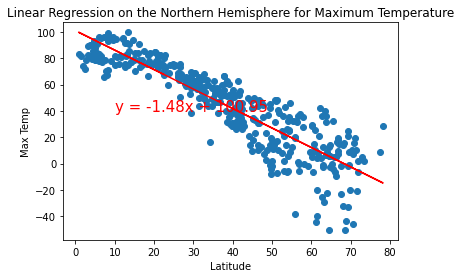

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

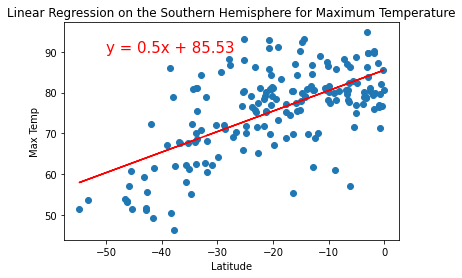

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

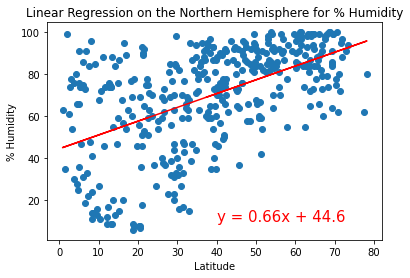

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

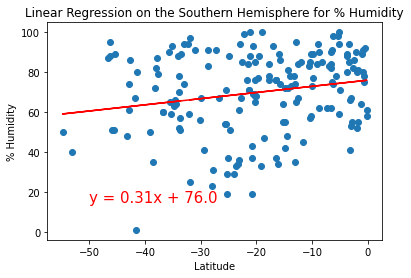

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

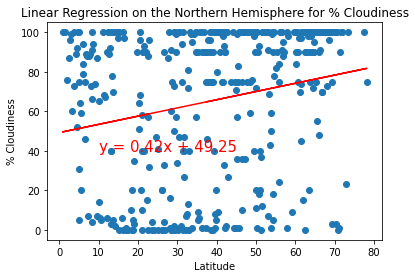

In [54]:
# Linear regression on the Northern Hemisphere(Cloudiness)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(10,40))

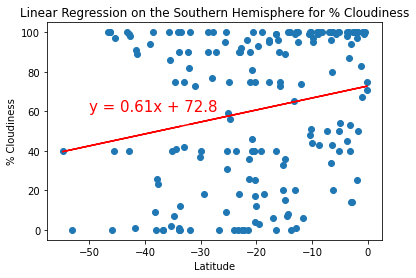

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

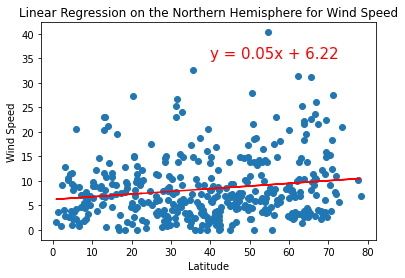

In [59]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

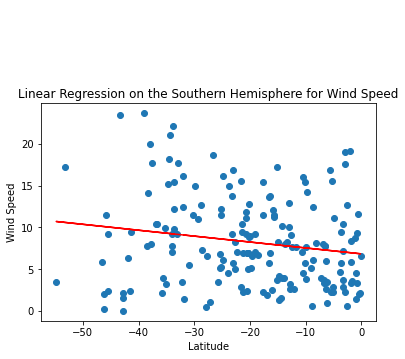

In [61]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))